# Group member:  Xinyue Yan, Ross Carter

## Topic: Pumpkin_seeds

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import missingno as ms
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

import sklearn

In [2]:
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [3]:
print(df.shape)
df.head()

(2500, 13)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


<AxesSubplot:>

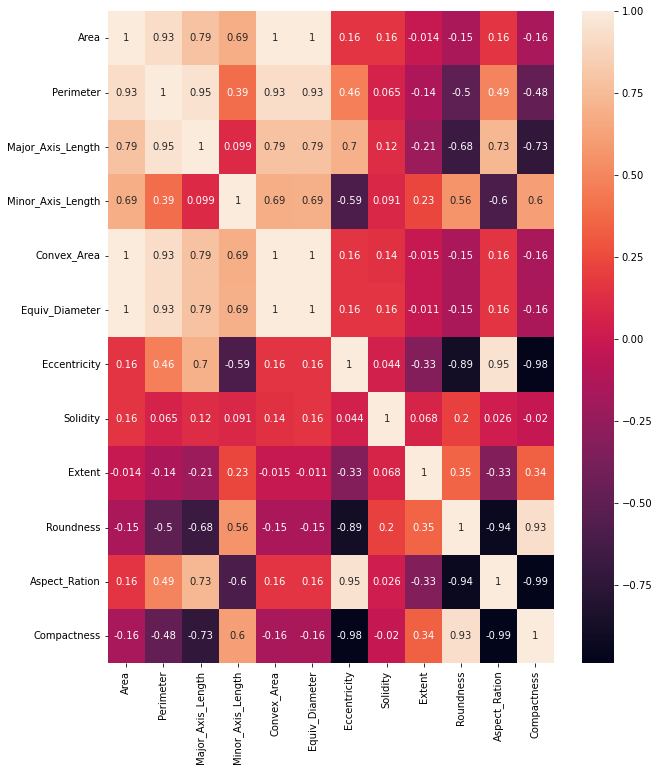

In [4]:
sns.heatmap(df.corr(),annot=True)

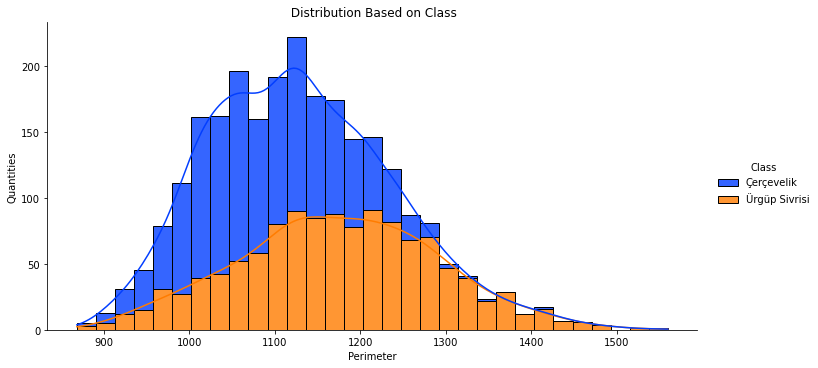

In [5]:
sns.displot(x = df['Perimeter'], hue = df['Class'], kde = True, data = df, 
            multiple = 'stack', alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title(' Distribution Based on Class')
plt.xlabel("Perimeter")
plt.ylabel("Quantities");

# Data Preprocessing & EDA

In [6]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df_c=df['Class']

In [9]:
df_c.value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [10]:
df['Class']=df['Class'].map({'Çerçevelik':1,'Ürgüp Sivrisi':0})

In [11]:
df['Class'].value_counts()

1    1300
0    1200
Name: Class, dtype: int64

In [12]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,1
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,1
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,1
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,1
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,1


In [13]:
X = df.drop('Class', axis = 1)
y = np.where(df.Class, 1, 0)

# Scaled data is necessary for ML model

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),       
        ('std_scaler', StandardScaler())
        ])

In [16]:
X_col = X.columns
X = pd.DataFrame(num_pipeline.fit_transform(X))

In [17]:
X.columns = X_col

In [18]:
X.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166


# Splite data for training and testing

In [19]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [21]:
lr_pred = logreg.predict(X_test)

In [22]:
from sklearn import metrics

In [23]:
lr_cm = metrics.confusion_matrix(y_test, lr_pred)
lr_cm

array([[202,  42],
       [ 27, 229]])

In [24]:
pd.Series(y_test).value_counts()

1    256
0    244
dtype: int64

<AxesSubplot:>

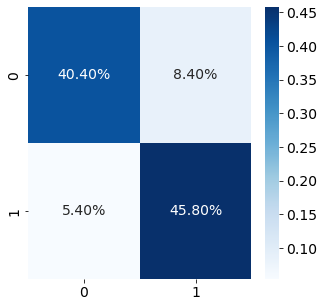

In [25]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(lr_cm/np.sum(lr_cm), annot=True, fmt='.2%', cmap='Blues')

In [26]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve

In [27]:
def perfMatrix(obs, pred):
    print('Precision: %.3f' % precision_score(obs, pred))
    print('Recall: %.3f' % recall_score(obs, pred))    
    print('F1_score: %.3f' % f1_score(obs, pred))
    print('accuracy_score:%.3f'% accuracy_score(obs, pred))

In [28]:
perfMatrix(y_test, lr_pred)

Precision: 0.845
Recall: 0.895
F1_score: 0.869
accuracy_score:0.862


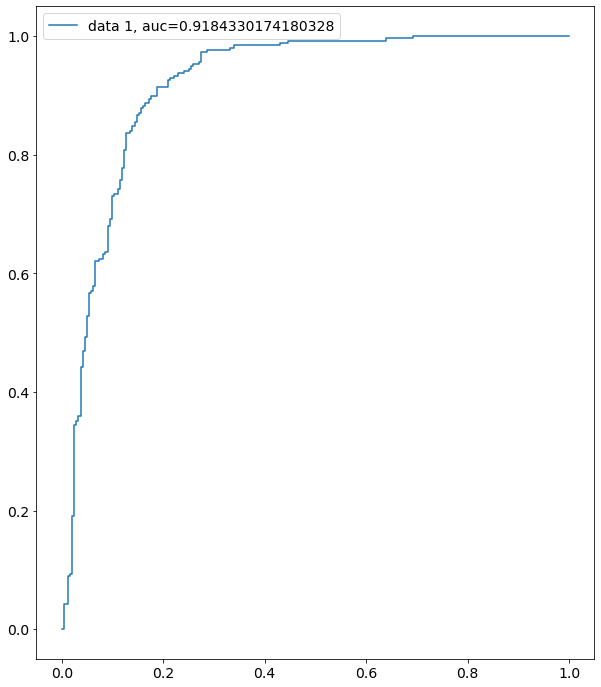

In [29]:
lr_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  lr_pred_proba)
auc = metrics.roc_auc_score(y_test, lr_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=2)
plt.show()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [31]:
pos_wt =sum(y_train == 0) /sum(y_train == 1)

In [32]:
class_weight={0: 1, 1: pos_wt}

In [33]:
%%time
rf_clf = RandomForestClassifier(max_depth=6, random_state=0, class_weight = class_weight, n_estimators=1000)

rf_clf.fit(X_train, y_train)

CPU times: user 2.03 s, sys: 21.2 ms, total: 2.05 s
Wall time: 1.72 s


RandomForestClassifier(class_weight={0: 1, 1: 0.9157088122605364}, max_depth=6,
                       n_estimators=1000, random_state=0)

In [34]:
rf_pred = rf_clf.predict(X_test)

In [35]:
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
rf_cm

array([[204,  40],
       [ 26, 230]])

<AxesSubplot:>

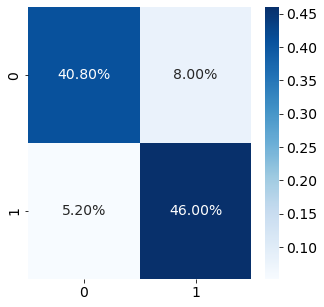

In [36]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(rf_cm/np.sum(rf_cm), annot=True, fmt='.2%', cmap='Blues')

In [37]:
perfMatrix(y_test, rf_pred)

Precision: 0.852
Recall: 0.898
F1_score: 0.875
accuracy_score:0.868


# CatBoost

In [38]:
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

In [39]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
cb_class_weights = dict(zip(classes, weights))

In [40]:
cb_class_weights

{0: 1.0460251046025104, 1: 0.9578544061302682}

In [41]:
cb_clf = CatBoostClassifier(loss_function= "Logloss", class_weights=cb_class_weights, silent = True)
cb_clf.fit(X_train, y_train)

In [42]:
cb_pred = cb_clf.predict(X_test)

In [43]:
cb_cm = metrics.confusion_matrix(y_test, cb_pred)
cb_cm

array([[205,  39],
       [ 29, 227]])

<AxesSubplot:>

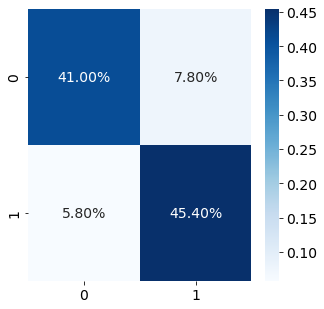

In [44]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(cb_cm/np.sum(cb_cm), annot=True, fmt='.2%', cmap='Blues')

In [45]:
perfMatrix(y_test, cb_pred)

Precision: 0.853
Recall: 0.887
F1_score: 0.870
accuracy_score:0.864


In [46]:
!pip install optuna

In [47]:
import optuna
from optuna.integration import CatBoostPruningCallback
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [48]:
cb_class_weights

{0: 1.0460251046025104, 1: 0.9578544061302682}

In [49]:
def objective(trial: optuna.Trial) -> float:
    
    global cb_class_weights
    
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)
    
    param = {        
        "depth": trial.suggest_int("depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        'l2_leaf_reg':trial.suggest_int('l2_leaf_reg', 10, 100),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),        
        "eval_metric": "Accuracy",
        "objective": "Logloss",
        "class_weights":cb_class_weights,
        }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    cbm = cb.CatBoostClassifier(**param)

    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
    cbm.fit(
        train_x,
        train_y,
        eval_set=[(valid_x, valid_y)],
        verbose=0,
        early_stopping_rounds=100,
        callbacks=[pruning_callback],        
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = cbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = f1_score(valid_y, pred_labels)

    return accuracy

In [50]:
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize")
study.optimize(objective, n_trials=40, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-12-01 14:45:39,548] A new study created in memory with name: no-name-21c7677d-9a7f-4747-8fad-6d439ca23917
[I 2022-12-01 14:45:39,734] Trial 0 finished with value: 0.8939051918735892 and parameters: {'depth': 4, 'learning_rate': 0.02216719635437328, 'l2_leaf_reg': 28, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8939051918735892.
[I 2022-12-01 14:45:39,856] Trial 1 finished with value: 0.9017857142857143 and parameters: {'depth': 4, 'learning_rate': 0.04955374990248759, 'l2_leaf_reg': 17, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.9017857142857143.
[I 2022-12-01 14:45:40,014] Trial 2 finished with value: 0.9217002237136465 and parameters: {'depth': 5, 'learning_rate': 0.09214989707598681, 'l2_leaf_reg': 84, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 4.151057341021107}. Best is trial 2 with value: 0.9217002237136465.
[I 2022-12-01 14:45:41,805] Trial 3 finished with val

Number of finished trials: 40
Best trial:
  Value: 0.9217002237136465
  Params: 
    depth: 5
    learning_rate: 0.09214989707598681
    l2_leaf_reg: 84
    boosting_type: Plain
    bootstrap_type: Bayesian
    bagging_temperature: 4.151057341021107


In [51]:
print('best_value:', study.best_value)

best_value: 0.9217002237136465


In [52]:
%%time 

cb_optuna = cb.CatBoostClassifier(**study.best_params, silent = True)
cb_optuna.fit(X_train, y_train)

CPU times: user 2.04 s, sys: 1.15 s, total: 3.19 s
Wall time: 1.12 s


In [53]:
cb_optuna_pred = cb_optuna.predict(X_test)

In [54]:
perfMatrix(y_test, cb_optuna_pred)

Precision: 0.858
Recall: 0.898
F1_score: 0.878
accuracy_score:0.872


In [55]:
cb_cm_ = metrics.confusion_matrix(y_test, cb_optuna_pred)
cb_cm_

array([[206,  38],
       [ 26, 230]])

<AxesSubplot:>

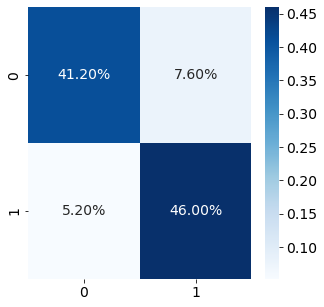

In [56]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cb_cm_/np.sum(cb_cm_), annot=True, fmt='.2%', cmap='Blues')

# MLP

In [57]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)

In [58]:
mlp_pred = mlp_clf.predict(X_test)

In [59]:
perfMatrix(y_test, mlp_pred)

Precision: 0.848
Recall: 0.914
F1_score: 0.880
accuracy_score:0.872


In [60]:
mlp_cm = metrics.confusion_matrix(y_test, mlp_pred)
mlp_cm

array([[202,  42],
       [ 22, 234]])

# K-Fold Cross Validation.  (k=5)

In [61]:
from sklearn.model_selection import KFold, cross_val_score

In [62]:
k_folds = KFold(n_splits = 5, random_state=1234, shuffle=True)

In [82]:
precison_5_fold = []
recall_5_fold = []
f1_5_fold = []
accuracy_5_fold= []
for trn_idx, tst_idx in k_folds.split(X):
    mlp_clf = MLPClassifier(random_state=1, max_iter=1000).fit(X.loc[trn_idx], y[trn_idx])
    mlp_pred = mlp_clf.predict(X.loc[tst_idx])
    precison_5_fold.append(precision_score(y[tst_idx], mlp_pred))
    recall_5_fold.append(recall_score(y[tst_idx], mlp_pred))
    f1_5_fold.append(f1_score(y[tst_idx], mlp_pred)) 
    accuracy_5_fold.append(accuracy_score(y[tst_idx], mlp_pred))

In [64]:
precison_5_fold

[0.8692579505300353,
 0.8773946360153256,
 0.914396887159533,
 0.8763636363636363,
 0.8397212543554007]

In [66]:
recall_5_fold

[0.9111111111111111,
 0.9087301587301587,
 0.914396887159533,
 0.9233716475095786,
 0.926923076923077]

In [68]:
f1_5_fold

[0.8896925858951175,
 0.8927875243664717,
 0.914396887159533,
 0.8992537313432836,
 0.8811700182815356]

In [83]:
accuracy_5_fold

[0.878, 0.89, 0.912, 0.892, 0.87]

In [84]:
import statistics
precion_mean= statistics.mean(precison_5_fold)
recall_mean=statistics.mean(recall_5_fold)
f1_mean=statistics.mean(f1_5_fold)
accuracy_mean=statistics.mean(accuracy_5_fold)
print('precion_mean:',precion_mean)
print('recall_mean:',recall_mean)
print('f1_mean:',f1_mean)
print('accuracy_mean:',accuracy_mean)

precion_mean: 0.8754268728847862
recall_mean: 0.9169065762866917
f1_mean: 0.8954601494091883
accuracy_mean: 0.8884


# get ensembled prediction

In [70]:
cb_prob = cb_optuna.predict_proba(X_test)[:,1]
rf_prob = rf_clf.predict_proba(X_test)[:,1]
mlp_prob = mlp_clf.predict_proba(X_test)[:,1]

In [71]:
ensemble_prob = (cb_prob + rf_prob + mlp_prob)/3

In [72]:
ensemble_pred = np.where(ensemble_prob > 0.5, 1, 0) 

In [73]:
ensemble_cm = metrics.confusion_matrix(y_test, ensemble_pred)
ensemble_cm

array([[205,  39],
       [ 22, 234]])

<AxesSubplot:>

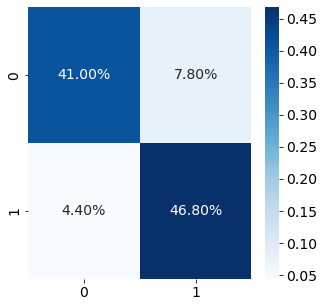

In [74]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(ensemble_cm/np.sum(ensemble_cm), annot=True, fmt='.2%', cmap='Blues')

In [75]:
perfMatrix(y_test, ensemble_pred)

Precision: 0.857
Recall: 0.914
F1_score: 0.885
accuracy_score:0.878
